In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv')

# Drop the "Country" column from the dataset
data = data.drop('Country', axis=1)

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    316800 non-null  int64
 1   Tiredness                316800 non-null  int64
 2   Dry-Cough                316800 non-null  int64
 3   Difficulty-in-Breathing  316800 non-null  int64
 4   Sore-Throat              316800 non-null  int64
 5   None_Sympton             316800 non-null  int64
 6   Pains                    316800 non-null  int64
 7   Nasal-Congestion         316800 non-null  int64
 8   Runny-Nose               316800 non-null  int64
 9   Diarrhea                 316800 non-null  int64
 10  None_Experiencing        316800 non-null  int64
 11  Age_0-9                  316800 non-null  int64
 12  Age_10-19                316800 non-null  int64
 13  Age_20-24                316800 non-null  int64
 14  Age_25-59                316800 non-

# Evaluation Methods

Before we get started coding, it's important to discuss<strong> evaluation techniques to review model performance</strong>.

The angle of evaluation depends on the scope of your model, and specifically, whether it is a classification or regression model.

In the case of classification, common evaluation methods include<strong>  the confusion matrix, classification report, and accuracy s</strong>core.

## 1) Accuracy Score
This is a simple metric measuring how many cases the model classified correctly divided by the number of cases. If all predictions are correct, the accuracy score is 1.0, and 0 when all predicted cases are wrong.

## 2) Confusion Matrix
A confusion matrix, also known as an error matrix, is a simple table that summarizes the performance of the model, including the number of false-positives and false-negatives.

## 3) Classification Report
Another popular classification technique is the classification report, which generates three evaluation metrics.

<strong> Precision </strong> is the ratio of correctly predicted true-positives to the total of predicted positive cases. A high precision score translates to a low number of false-positives. 

<strong> Recall </strong>  is the ratio of correctly predicted true-positives to the total of actual positive cases. This metric addresses the question of how many positive outcomes were rightly classified as positive?

<strong> F1-score </strong> is a weighted average of precision and recall. It’s typically used as a metric for model-to-model comparison rather than internal model accuracy. In addition, the f1-score is generally lower than the accuracy score due to the way recall and precision are calculated.
<strong> 
Suppo </strong> rt is not an evaluation metric per se but rather a tally of the number of positive and negative cases respectively.

In [2]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data.drop('Severity_Severe', axis=1)  # Features
y = data['Severity_Severe']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Using 20% of the data for testing


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Initialize the classifiers
knn = KNeighborsClassifier(n_neighbors=3)

# Train the models
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [5]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [6]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

K-Nearest Neighbors Test accuracy: 1.00
K-Nearest Neighbors Confusion Matrix:


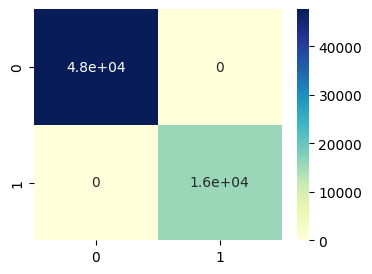

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47641
           1       1.00      1.00      1.00     15719

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360



In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate K-Nearest Neighbors model
knn_y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)

# Print and plot the results for K-Nearest Neighbors
print(f"K-Nearest Neighbors Test accuracy: {knn_accuracy:.2f}")
print("K-Nearest Neighbors Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(knn_cm, annot=True, cmap="YlGnBu")
plt.show()
print("K-Nearest Neighbors Classification Report:")
print(knn_report)

In [8]:
# Data point to predict 


# Sample input data 
sample_input_data = {
    'Fever': 1,
    'Tiredness': 1,
    'Dry-Cough': 1,
    'Difficulty-in-Breathing':1,
    'Sore-Throat':1,
    'None_Sympton':0,
    'Pains':1,
    'Nasal-Congestion':1,
    'Runny-Nose':1,
    'Diarrhea':1,
    'None_Experiencing':0,
    'Age_0-9':0,
    'Age_10-19':0,
    'Age_20-24':0,
    'Age_25-59':0,
    'Age_60+':1,
    'Gender_Female':0,
    'Gender_Male':1,
    'Gender_Transgender':0,
    'Severity_Mild':0,
    'Severity_Moderate':0,
    'Severity_None':0,
    'Contact_Dont-Know':1,
    'Contact_No':0,
    'Contact_Yes':0
    
    # Add other features here, excluding 'Severity_Severe'
}

# Convert the sample input data into a DataFrame
sample_input_df = pd.DataFrame([sample_input_data])

# Use the trained KNN model to predict
predicted_output = knn.predict(sample_input_df)

print("Predicted Severity_Severe:", predicted_output[0])


Predicted Severity_Severe: 1


Logistic Regression Test accuracy: 1.00
Logistic Regression Confusion Matrix:


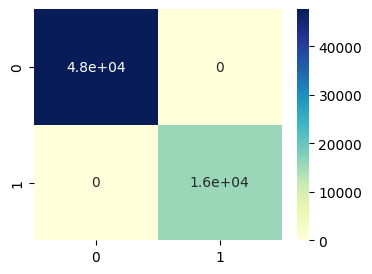

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47641
           1       1.00      1.00      1.00     15719

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360



In [9]:
# Evaluate Logistic Regression model
log_reg_y_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_cm = confusion_matrix(y_test, log_reg_y_pred)
log_reg_report = classification_report(y_test, log_reg_y_pred)

# Print and plot the results for Support Vector Machine
print(f"Logistic Regression Test accuracy: {log_reg_accuracy:.2f}")
print("Logistic Regression Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(log_reg_cm, annot=True, cmap="YlGnBu")
plt.show()
print("Logistic Regression Classification Report:")
print(log_reg_report)

In [10]:
# Data point to predict 


# Sample input data 
sample_input_data = {
    'Fever': 1,
    'Tiredness': 1,
    'Dry-Cough': 1,
    'Difficulty-in-Breathing':1,
    'Sore-Throat':1,
    'None_Sympton':0,
    'Pains':1,
    'Nasal-Congestion':1,
    'Runny-Nose':1,
    'Diarrhea':1,
    'None_Experiencing':0,
    'Age_0-9':0,
    'Age_10-19':0,
    'Age_20-24':0,
    'Age_25-59':0,
    'Age_60+':1,
    'Gender_Female':0,
    'Gender_Male':1,
    'Gender_Transgender':0,
    'Severity_Mild':0,
    'Severity_Moderate':0,
    'Severity_None':0,
    'Contact_Dont-Know':1,
    'Contact_No':0,
    'Contact_Yes':0
    
    # Add other features here, excluding 'Severity_Severe'
}

# Convert the sample input data into a DataFrame
sample_input_df = pd.DataFrame([sample_input_data])

# Use the trained logistic regression model to predict
predicted_output = log_reg.predict(sample_input_df)

print("Predicted Severity_Severe:", predicted_output[0])


Predicted Severity_Severe: 1


Gaussian Naive Bayes Test accuracy: 1.00
Gaussian Naive Bayes Confusion Matrix:


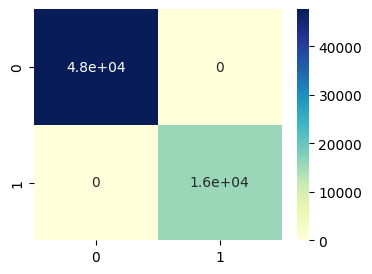

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47641
           1       1.00      1.00      1.00     15719

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360



In [11]:
# Predictions for Gaussian Naive Bayes
nb_y_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_report = classification_report(y_test, nb_y_pred)

# Plot and print the results for Gaussian Naive Bayes
print(f"Gaussian Naive Bayes Test accuracy: {nb_accuracy:.2f}")
print("Gaussian Naive Bayes Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(nb_cm, annot=True, cmap="YlGnBu")
plt.show()
print("Gaussian Naive Bayes Classification Report:")
print(nb_report)

In [12]:
# Data point to predict 


# Sample input data 
sample_input_data = {
    'Fever': 1,
    'Tiredness': 1,
    'Dry-Cough': 1,
    'Difficulty-in-Breathing':1,
    'Sore-Throat':1,
    'None_Sympton':0,
    'Pains':1,
    'Nasal-Congestion':1,
    'Runny-Nose':1,
    'Diarrhea':1,
    'None_Experiencing':0,
    'Age_0-9':0,
    'Age_10-19':0,
    'Age_20-24':0,
    'Age_25-59':0,
    'Age_60+':1,
    'Gender_Female':0,
    'Gender_Male':1,
    'Gender_Transgender':0,
    'Severity_Mild':0,
    'Severity_Moderate':0,
    'Severity_None':0,
    'Contact_Dont-Know':1,
    'Contact_No':0,
    'Contact_Yes':0
    
    # Add other features here, excluding 'Severity_Severe'
}

# Convert the sample input data into a DataFrame
sample_input_df = pd.DataFrame([sample_input_data])

# Use the trained Naive Bayes model to predict
predicted_output = nb.predict(sample_input_df)

print("Predicted Severity_Severe:", predicted_output[0])


Predicted Severity_Severe: 1


Decision Tree Test accuracy: 1.00
Decision Tree Confusion Matrix:


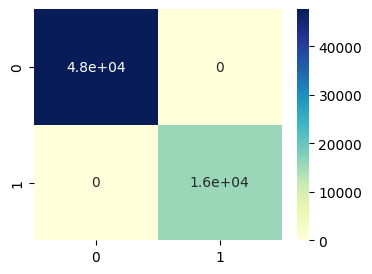

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47641
           1       1.00      1.00      1.00     15719

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360



In [13]:
# Predictions for Decision Tree
dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

# Plot and print the results for Decision Tree
print(f"Decision Tree Test accuracy: {dt_accuracy:.2f}")
print("Decision Tree Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(dt_cm, annot=True, cmap="YlGnBu")
plt.show()
print("Decision Tree Classification Report:")
print(dt_report)

In [14]:
# Data point to predict 


# Sample input data 
sample_input_data = {
    'Fever': 1,
    'Tiredness': 1,
    'Dry-Cough': 1,
    'Difficulty-in-Breathing':1,
    'Sore-Throat':1,
    'None_Sympton':0,
    'Pains':1,
    'Nasal-Congestion':1,
    'Runny-Nose':1,
    'Diarrhea':1,
    'None_Experiencing':0,
    'Age_0-9':0,
    'Age_10-19':0,
    'Age_20-24':0,
    'Age_25-59':0,
    'Age_60+':1,
    'Gender_Female':0,
    'Gender_Male':1,
    'Gender_Transgender':0,
    'Severity_Mild':0,
    'Severity_Moderate':0,
    'Severity_None':0,
    'Contact_Dont-Know':1,
    'Contact_No':0,
    'Contact_Yes':0
    
    # Add other features here, excluding 'Severity_Severe'
}

# Convert the sample input data into a DataFrame
sample_input_df = pd.DataFrame([sample_input_data])

# Use the trained decision tree model to predict
predicted_output = dt.predict(sample_input_df)

print("Predicted Severity_Severe:", predicted_output[0])


Predicted Severity_Severe: 1
